In [2]:
from scipy import stats

个人想法：
scipy似乎处理浮点数很不好，支持的检验分布也不是很完整，因此需要调用R函数

## 概率分布
> 离散概率分布，即概率质量函数（probability mass function, pmf）
>> 二项分布：binom.pmf

>> 泊松分布：poisson.pmf

>> 几何分布：geom.pmf

>> 超几何分布：hypergeom.pmf

> 连续概率分布，即概率密度函数（probability density function, pdf）
>> 正态分布：norm.pdf

>> 指数分布：expon.pdf

>> β分布：beta.pdf

## 假设检验
> 伯努利检验：binom_test(x, n=None, p=0.5, alternative='two-sided')

> 卡方检验：chisquare(f_obs, f_exp=None, ddof=0, axis=0) 用于理论值与观察值的比较
>> chi2, p = chisquare(f_obs, f_exp)

> Pearson卡方检验：chi2_contingency(observed, correction=True, lambda_=None) 检验变量间是否有关联
>> chi2, p, dof, ex = chi2_contingency(obs, correction=False)

> fisher精确检验：fisher_exact(table, alternative='two-sided')
>> oddsratio, pvalue = fisher_exact([[8, 2], [1, 5]])

## 回归检验
> Spearman correlation：spearmanr
>> corr, p_value = spearmanr(x, y)

> Pearson correlation：pearsonr
>> corr, p_value = pearsonr(x, y)

## 示例

### 泊松分布的应用

某家小杂货店，平均每周售出两个水果罐头，请问该水果店的最佳库存量是多少？

分析：假定不存在季节因素，可以近似认为，该问题满足Poisson分布三个条件：

1)顾客购买水果罐头是小概率事件

2)购买水果罐头的顾客之间是独立的，也即不会互相依赖或者影响

3)顾客购买水果罐头的概率是稳定的

In [11]:
stats.poisson.pmf(range(7),2).cumsum()

array([0.13533528, 0.40600585, 0.67667642, 0.85712346, 0.94734698,
       0.98343639, 0.99546619])

存货5个罐头时，缺货的几率＜0.05

### 泊松分布与美国枪击案

判断”美国枪击案发生的次数”是否满足”泊松分布”的三个条件：

1)枪击案是小概率事件

2)枪击案之间彼此独立，不会互相影响

3)枪击案的发生概率是稳定的

显然，第三个条件是关键，如果成立，说明美国的治安没有恶化

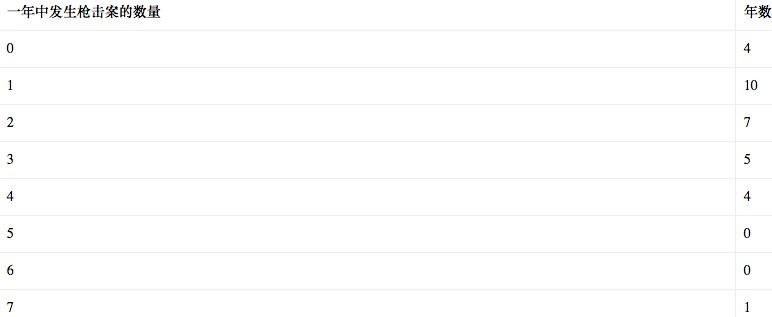

In [6]:
# 1982-2012的31年间枪击案的分布情况为
from IPython.display import Image
Image(filename="C:/Users/zty/Desktop/US_gun.jpg",width=600,height=800)

In [8]:
num_of_years=[4,10,7,5,4,0,0,1]
mu = sum(x*y for x,y in zip(range(8),num_of_years))/sum(num_of_years)
mu

2.0

In [23]:
#理论分布
exp = sum(num_of_years)*stats.poisson.pmf(range(8),2)
exp

array([4.19539378, 8.39078756, 8.39078756, 5.59385837, 2.79692919,
       1.11877167, 0.37292389, 0.10654968])

<BarContainer object of 8 artists>

(-1, 8)

(0, 11)

Text(0.5, 0, 'mass shootings in a year')

Text(0, 0.5, 'years')

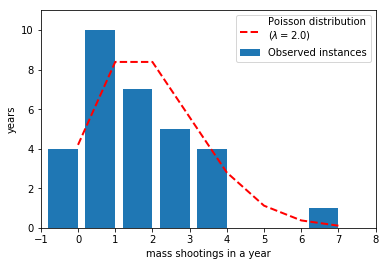

In [25]:
# 绘图大致观察分布
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(np.arange(8)-0.4,num_of_years,label='Observed instances')
plt.plot(range(8),exp,ls='dashed',lw=2,c='r',label='Poisson distribution\n$(\lambda=2.0)$')
plt.xlim([-1,8])
plt.ylim([0,11])
plt.xlabel('mass shootings in a year')
plt.ylabel('years')
plt.legend(loc='best')

分布形态比较符合poisson分布

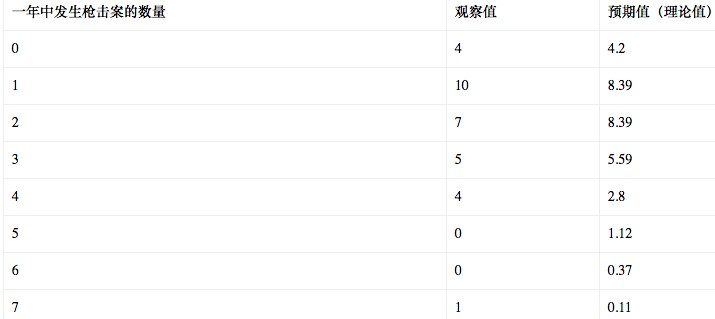

In [13]:
# 对比
from IPython.display import Image
Image(filename="C:/Users/zty/Desktop/US_gun2.jpg",width=600,height=800)

In [22]:
# 利用chi-square test检验是否存在差异
stats.chisquare([4,10,7,5,4,0,0,1],[4.2,8.39,8.39,5.59,2.8,1.12,0.37,0.31])

Power_divergenceResult(statistic=4.151125076682338, pvalue=0.7622155611255714)

结论：枪击案符合泊松分布